<a href="https://colab.research.google.com/github/beuchi8888/Beuchi/blob/master/Estacion_AEMET_RetiroMadrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# URL del API para los datos
url_datos = "https://opendata.aemet.es/opendata/sh/595281a7"

# Obtener los datos en formato JSON
response = requests.get(url_datos)
data = response.json()

# Crear un dataframe con los datos
df1 = pd.DataFrame(data)

# Mostrar las primeras filas del dataframe
df1.head()

# Ahora puedes analizar la velocidad del viento y otras variables utilizando el dataframe.
# Por ejemplo, para obtener la velocidad del viento, puedes utilizar la columna 'velocidad_viento'.
# Puedes utilizar las funciones de pandas para filtrar, agrupar y analizar los datos.

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,horaracha,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2024-01-01,3195,"MADRID, RETIRO",MADRID,667,"6,6","0,0","3,8",08:50,"9,4",...,15:50,"945,1",23,"940,8",03,85,99,Varias,62,15:30
1,2024-01-02,3195,"MADRID, RETIRO",MADRID,667,"5,5","2,0","2,8",05:50,"8,2",...,02:10,"945,2",11,"941,7",24,92,99,Varias,83,13:20
2,2024-01-03,3195,"MADRID, RETIRO",MADRID,667,"10,1","2,7","8,1",00:00,"12,1",...,16:00,"942,7",10,"940,1",18,99,99,Varias,91,22:00
3,2024-01-04,3195,"MADRID, RETIRO",MADRID,667,"9,4","9,7","8,2",00:40,"10,6",...,19:50,"941,9",00,"931,8",24,99,99,Varias,96,11:50
4,2024-01-05,3195,"MADRID, RETIRO",MADRID,667,"6,6","0,1","4,6",06:20,"8,6",...,22:00,"936,3",24,"929,8",05,71,99,Varias,53,15:40


In [ ]:
import requests
import pandas as pd

# URL del API para los datos
url_datos = "https://opendata.aemet.es/opendata/sh/0f26fb03"

# Obtener los datos en formato JSON
response = requests.get(url_datos)
data = response.json()

# Crear un dataframe con los datos
df2 = pd.DataFrame(data)

# Mostrar las primeras filas del dataframe
df2.head()

# Ahora puedes analizar la velocidad del viento y otras variables utilizando el dataframe.
# Por ejemplo, para obtener la velocidad del viento, puedes utilizar la columna 'velocidad_viento'.
# Puedes utilizar las funciones de pandas para filtrar, agrupar y analizar los datos.

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,horaracha,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2024-07-01,3195,"MADRID, RETIRO",MADRID,667,"24,1","0,0","18,2",05:10,"30,0",...,21:50,"943,7",23,"938,5",03,40,69,04:30,24,17:10
1,2024-07-02,3195,"MADRID, RETIRO",MADRID,667,"23,8","0,0","16,0",05:30,"31,6",...,19:20,"944,1",07,"939,0",18,39,69,05:30,25,14:50
2,2024-07-03,3195,"MADRID, RETIRO",MADRID,667,"25,5","0,0","17,2",05:50,"33,8",...,00:20,"940,9",08,"936,4",Varias,28,56,06:10,14,12:50
3,2024-07-04,3195,"MADRID, RETIRO",MADRID,667,"29,0","0,0","21,2",05:50,"36,9",...,05:20,"939,3",08,"935,3",19,26,41,06:10,15,15:20
4,2024-07-05,3195,"MADRID, RETIRO",MADRID,667,"29,8","0,0","22,3",05:40,"37,3",...,18:30,"937,2",07,"931,4",17,31,54,05:20,16,15:30


In [ ]:
df1["FECHA"] = pd.to_datetime(df1["fecha"], format="%Y-%m-%d", errors="coerce")

In [ ]:
df2["FECHA"] = pd.to_datetime(df2["fecha"], format="%Y-%m-%d", errors="coerce")

In [ ]:
# Concatenar verticalmente (axis=0) y ordenar por fecha
df = pd.concat([df1, df2], axis=0)
df = df.sort_values("FECHA")

# Establecer FECHA como índice para poder aplicar resample u otras operaciones temporales
df = df.set_index("FECHA")

# Mostrar una vista previa
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,horaracha,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
FECHA,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2024-01-01,3195,"MADRID, RETIRO",MADRID,667,"6,6","0,0","3,8",08:50,"9,4",...,15:50,"945,1",23,"940,8",03,85,99,Varias,62,15:30
2024-01-02,2024-01-02,3195,"MADRID, RETIRO",MADRID,667,"5,5","2,0","2,8",05:50,"8,2",...,02:10,"945,2",11,"941,7",24,92,99,Varias,83,13:20
2024-01-03,2024-01-03,3195,"MADRID, RETIRO",MADRID,667,"10,1","2,7","8,1",00:00,"12,1",...,16:00,"942,7",10,"940,1",18,99,99,Varias,91,22:00
2024-01-04,2024-01-04,3195,"MADRID, RETIRO",MADRID,667,"9,4","9,7","8,2",00:40,"10,6",...,19:50,"941,9",00,"931,8",24,99,99,Varias,96,11:50
2024-01-05,2024-01-05,3195,"MADRID, RETIRO",MADRID,667,"6,6","0,1","4,6",06:20,"8,6",...,22:00,"936,3",24,"929,8",05,71,99,Varias,53,15:40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        366 non-null    object 
 1   indicativo   366 non-null    object 
 2   nombre       366 non-null    object 
 3   provincia    366 non-null    object 
 4   altitud      366 non-null    float32
 5   tmed         358 non-null    float32
 6   prec         366 non-null    float32
 7   tmin         358 non-null    object 
 8   horatmin     358 non-null    object 
 9   tmax         358 non-null    object 
 10  horatmax     358 non-null    object 
 11  dir          361 non-null    float32
 12  velmedia     363 non-null    float32
 13  racha        361 non-null    float32
 14  horaracha    361 non-null    object 
 15  presMax      348 non-null    float32
 16  horaPresMax  348 non-null    object 
 17  presMin      347 non-null    object 
 18  horaPresMin  347 non-null    ob

In [ ]:
df

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,horaracha,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
FECHA,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2024-01-01,3195,"MADRID, RETIRO",MADRID,667.0,6.6,0.0,"3,8",08:50,"9,4",...,15:50,945.099976,23,"940,8",03,85,99,Varias,62,15:30
2024-01-02,2024-01-02,3195,"MADRID, RETIRO",MADRID,667.0,5.5,2.0,"2,8",05:50,"8,2",...,02:10,945.200012,11,"941,7",24,92,99,Varias,83,13:20
2024-01-03,2024-01-03,3195,"MADRID, RETIRO",MADRID,667.0,10.1,2.7,"8,1",00:00,"12,1",...,16:00,942.700012,10,"940,1",18,99,99,Varias,91,22:00
2024-01-04,2024-01-04,3195,"MADRID, RETIRO",MADRID,667.0,9.4,9.7,"8,2",00:40,"10,6",...,19:50,941.900024,00,"931,8",24,99,99,Varias,96,11:50
2024-01-05,2024-01-05,3195,"MADRID, RETIRO",MADRID,667.0,6.6,0.1,"4,6",06:20,"8,6",...,22:00,936.299988,24,"929,8",05,71,99,Varias,53,15:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,2024-12-27,3195,"MADRID, RETIRO",MADRID,667.0,8.4,0.0,"5,4",03:20,"11,3",...,09:00,951.900024,11,"949,1",16,77,89,08:40,61,14:00
2024-12-28,2024-12-28,3195,"MADRID, RETIRO",MADRID,667.0,6.9,0.0,"3,3",08:00,"10,5",...,Varias,952.000000,10,"948,5",15,76,88,Varias,58,15:00
2024-12-29,2024-12-29,3195,"MADRID, RETIRO",MADRID,667.0,6.0,0.0,"1,2",07:40,"10,9",...,00:10,950.400024,10,"947,8",16,75,89,07:00,55,15:40


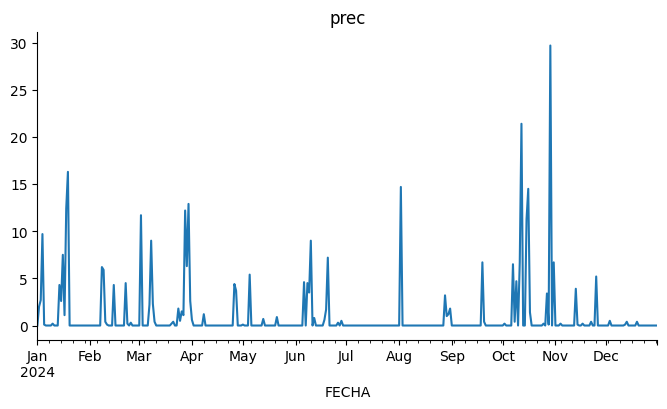

In [ ]:
from matplotlib import pyplot as plt
df['prec'].plot(kind='line', figsize=(8, 4), title='prec')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Define las columnas que quieres convertir
cols_to_convert = ['altitud', 'tmed', 'prec', 'dir', 'velmedia', 'racha', 'presMax']

# Convertir a string y luego a float32
for col in cols_to_convert:
    # 1. Convertir a string
    df[col] = df[col].astype(str)
    # 2. Reemplazar comas por puntos
    df[col] = df[col].str.replace(',', '.', regex=False)
    # 3. Convertir a float32
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float32')

# Verificar el nuevo tipo de datos
print(df.dtypes)

fecha           object
indicativo      object
nombre          object
provincia       object
altitud        float32
tmed           float32
prec           float32
tmin            object
horatmin        object
tmax            object
horatmax        object
dir            float32
velmedia       float32
racha          float32
horaracha       object
presMax        float32
horaPresMax     object
presMin         object
horaPresMin     object
hrMedia         object
hrMax           object
horaHrMax       object
hrMin           object
horaHrMin       object
dtype: object


In [ ]:
df_final = df[[ 'altitud', 'tmed', 'prec', 'dir', 'velmedia', 'racha', 'presMax']]

In [ ]:
df_final

,altitud,tmed,prec,dir,velmedia,racha,presMax
FECHA,,,,,,,
2024-01-01,667.0,6.6,0.0,23.0,1.4,6.4,945.099976
2024-01-02,667.0,5.5,2.0,14.0,0.3,4.4,945.200012
2024-01-03,667.0,10.1,2.7,26.0,1.7,7.2,942.700012
2024-01-04,667.0,9.4,9.7,29.0,1.1,4.7,941.900024
2024-01-05,667.0,6.6,0.1,29.0,3.6,12.2,936.299988
...,...,...,...,...,...,...,...
2024-12-27,667.0,8.4,0.0,4.0,1.7,5.8,951.900024
2024-12-28,667.0,6.9,0.0,99.0,0.8,4.7,952.000000
2024-12-29,667.0,6.0,0.0,7.0,0.6,5.0,950.400024


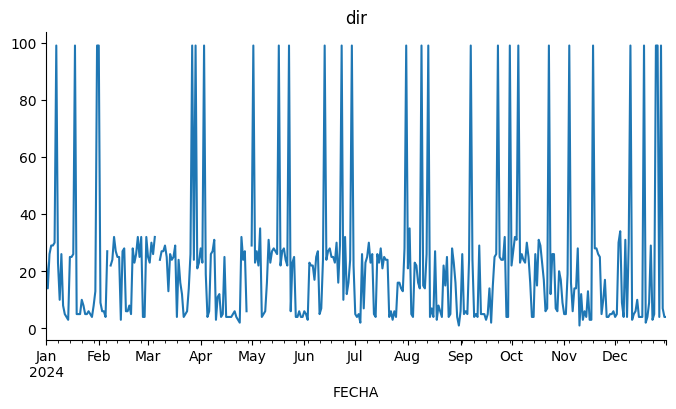

In [ ]:
# @title dir

from matplotlib import pyplot as plt
df_final['dir'].plot(kind='line', figsize=(8, 4), title='dir')
plt.gca().spines[['top', 'right']].set_visible(False)

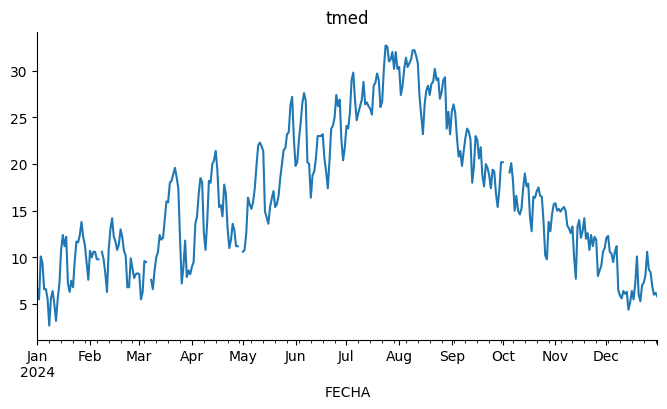

In [ ]:
# @title tmed

from matplotlib import pyplot as plt
df_final['tmed'].plot(kind='line', figsize=(8, 4), title='tmed')
plt.gca().spines[['top', 'right']].set_visible(False)

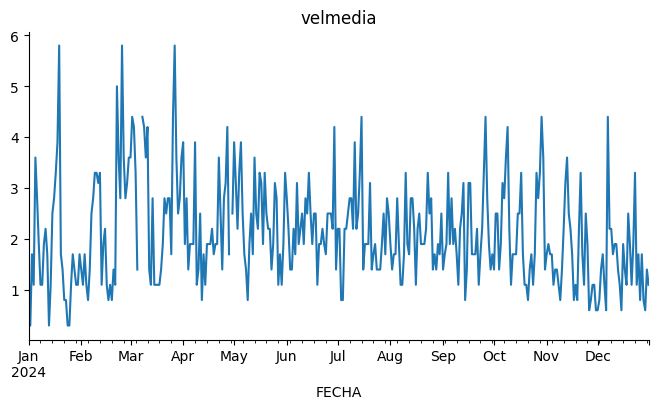

In [ ]:
# @title velmedia

from matplotlib import pyplot as plt
df_final['velmedia'].plot(kind='line', figsize=(8, 4), title='velmedia')
plt.gca().spines[['top', 'right']].set_visible(False)

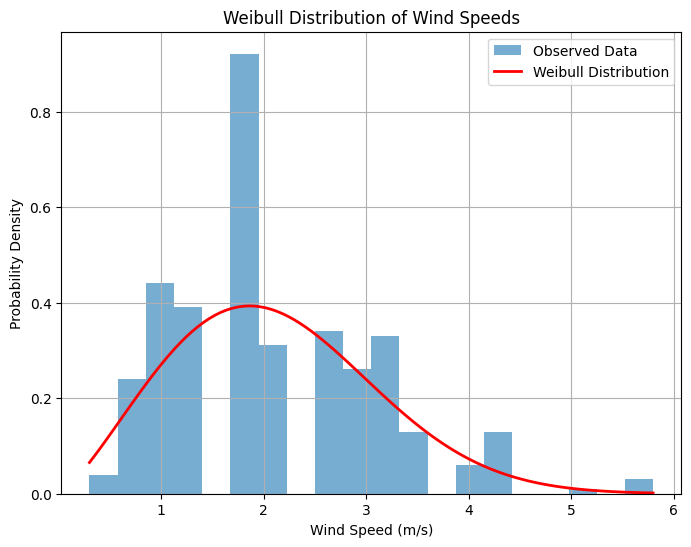

Shape parameter (k): 2.29
Scale parameter (c): 2.40


In [ ]:
!pip install scipy

import numpy as np
import pandas as pd
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Assuming 'velmedia' is your wind speed column in df_final
wind_speeds = df_final['velmedia'].dropna()  # Drop missing values if any

# Fit Weibull distribution
shape, loc, scale = weibull_min.fit(wind_speeds, floc=0)  # floc=0 sets location parameter to 0

# Generate x-values for the distribution
x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)

# Calculate Weibull probability density function (PDF)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(wind_speeds, bins=20, density=True, alpha=0.6, label='Observed Data')  # Histogram of observed data
plt.plot(x, pdf, 'r-', linewidth=2, label='Weibull Distribution')  # Weibull PDF

plt.title('Weibull Distribution of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Shape parameter (k): {shape:.2f}")
print(f"Scale parameter (c): {scale:.2f}")

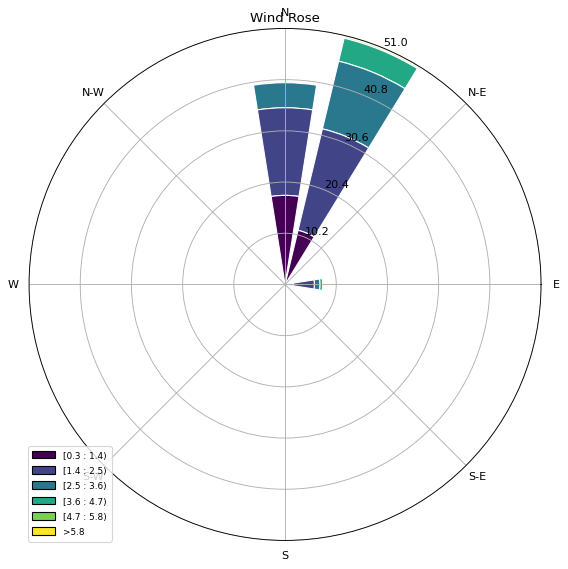

In [ ]:
!pip install windrose

import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pandas as pd


# Create wind speed and direction variables
ws = df_final['velmedia'].astype(float).values
wd = df_final['dir'].astype(float).values

# Remove NaN values from both ws and wd
# This ensures that both arrays have the same size after removing NaNs
mask = np.isfinite(ws) & np.isfinite(wd)
ws = ws[mask]
wd = wd[mask]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()

In [ ]:
df_limpio=df_final.dropna()



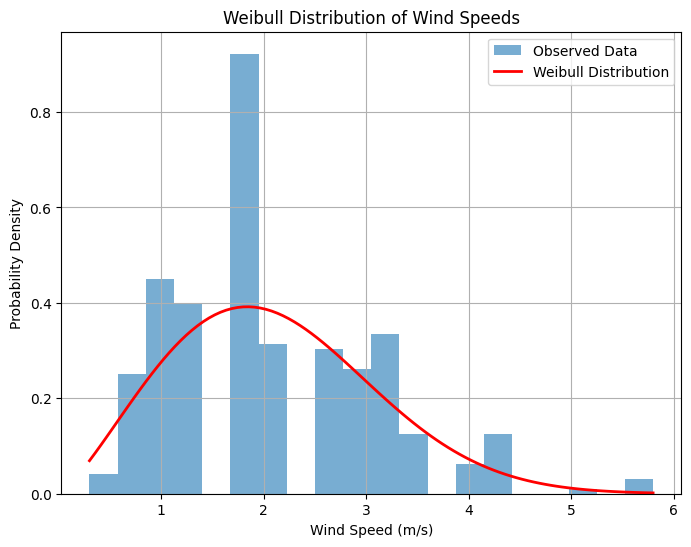

Shape parameter (k): 2.26
Scale parameter (c): 2.38


In [ ]:
!pip install scipy

import numpy as np
import pandas as pd
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# Assuming 'velmedia' is your wind speed column in df_final
wind_speeds = df_limpio['velmedia'].dropna()  # Drop missing values if any

# Fit Weibull distribution
shape, loc, scale = weibull_min.fit(wind_speeds, floc=0)  # floc=0 sets location parameter to 0

# Generate x-values for the distribution
x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)

# Calculate Weibull probability density function (PDF)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(wind_speeds, bins=20, density=True, alpha=0.6, label='Observed Data')  # Histogram of observed data
plt.plot(x, pdf, 'r-', linewidth=2, label='Weibull Distribution')  # Weibull PDF

plt.title('Weibull Distribution of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Shape parameter (k): {shape:.2f}")
print(f"Scale parameter (c): {scale:.2f}")